In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
!git clone https://github.com/jcwang123/BA-Transformer

Cloning into 'BA-Transformer'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 248 (delta 83), reused 198 (delta 45), pack-reused 0
Receiving objects: 100% (248/248), 15.25 MiB | 13.47 MiB/s, done.
Resolving deltas: 100% (83/83), done.
Checking out files: 100% (117/117), done.


## Import Drive and Set Current Working Directory

In [ ]:
from google.colab import drive
drive._mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/BA-Transformer')

In [ ]:
! pwd

/content/drive/.shortcut-targets-by-id/1w5h7LZR_dGS_2ecoj-rOyEk_an_sMXt7/BA-Transformer


In [ ]:
!pip install mxnet-cu92

     |████████████████████████████████| 789.8 MB 16 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
#number of data points (images)
import os
list = os.listdir("/content/drive/MyDrive/BA-Transformer-Data/image") # dir is your directory path
number_files = len(list)
print (number_files)

900


In [ ]:
#number of data points (masks)
import os
list = os.listdir("/content/drive/MyDrive/BA-Transformer-Data/mask") # dir is your directory path
number_files = len(list)
print (number_files)

900


In [ ]:
import cv2
import os
import random
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
    image_dir_path = '/content/drive/MyDrive/BA-Transformer-Data/image'
    mask_dir_path = '/content/drive/MyDrive/BA-Transformer-Data/mask'
    image_path_list = os.listdir(image_dir_path)
    mask_path_list = os.listdir(mask_dir_path)
    image_path_list.sort()
    mask_path_list.sort()

In [ ]:
print(image_path_list)

['ISIC_0000000.jpg', 'ISIC_0000001.jpg', 'ISIC_0000002.jpg', 'ISIC_0000004.jpg', 'ISIC_0000006.jpg', 'ISIC_0000007.jpg', 'ISIC_0000008.jpg', 'ISIC_0000009.jpg', 'ISIC_0000010.jpg', 'ISIC_0000011.jpg', 'ISIC_0000016.jpg', 'ISIC_0000017.jpg', 'ISIC_0000018.jpg', 'ISIC_0000019.jpg', 'ISIC_0000021.jpg', 'ISIC_0000024.jpg', 'ISIC_0000025.jpg', 'ISIC_0000026.jpg', 'ISIC_0000028.jpg', 'ISIC_0000029.jpg', 'ISIC_0000030.jpg', 'ISIC_0000031.jpg', 'ISIC_0000032.jpg', 'ISIC_0000034.jpg', 'ISIC_0000035.jpg', 'ISIC_0000038.jpg', 'ISIC_0000039.jpg', 'ISIC_0000041.jpg', 'ISIC_0000042.jpg', 'ISIC_0000044.jpg', 'ISIC_0000045.jpg', 'ISIC_0000046.jpg', 'ISIC_0000047.jpg', 'ISIC_0000048.jpg', 'ISIC_0000049.jpg', 'ISIC_0000050.jpg', 'ISIC_0000051.jpg', 'ISIC_0000054.jpg', 'ISIC_0000055.jpg', 'ISIC_0000058.jpg', 'ISIC_0000059.jpg', 'ISIC_0000060.jpg', 'ISIC_0000061.jpg', 'ISIC_0000062.jpg', 'ISIC_0000063.jpg', 'ISIC_0000065.jpg', 'ISIC_0000067.jpg', 'ISIC_0000068.jpg', 'ISIC_0000073.jpg', 'ISIC_0000074.jpg',

In [ ]:
print(mask_path_list)

['ISIC_0000000_Segmentation.png', 'ISIC_0000001_Segmentation.png', 'ISIC_0000002_Segmentation.png', 'ISIC_0000004_Segmentation.png', 'ISIC_0000006_Segmentation.png', 'ISIC_0000007_Segmentation.png', 'ISIC_0000008_Segmentation.png', 'ISIC_0000009_Segmentation.png', 'ISIC_0000010_Segmentation.png', 'ISIC_0000011_Segmentation.png', 'ISIC_0000016_Segmentation.png', 'ISIC_0000017_Segmentation.png', 'ISIC_0000018_Segmentation.png', 'ISIC_0000019_Segmentation.png', 'ISIC_0000021_Segmentation.png', 'ISIC_0000024_Segmentation.png', 'ISIC_0000025_Segmentation.png', 'ISIC_0000026_Segmentation.png', 'ISIC_0000028_Segmentation.png', 'ISIC_0000029_Segmentation.png', 'ISIC_0000030_Segmentation.png', 'ISIC_0000031_Segmentation.png', 'ISIC_0000032_Segmentation.png', 'ISIC_0000034_Segmentation.png', 'ISIC_0000035_Segmentation.png', 'ISIC_0000038_Segmentation.png', 'ISIC_0000039_Segmentation.png', 'ISIC_0000041_Segmentation.png', 'ISIC_0000042_Segmentation.png', 'ISIC_0000044_Segmentation.png', 'ISIC_000

In [ ]:
for image_path, mask_path in zip(image_path_list, mask_path_list):
        if image_path[-3:] == 'png' or image_path[-3:] == 'jpg':
            #             i = path[5:12]
            assert os.path.basename(image_path)[:-4].split(
                '_')[1] == os.path.basename(mask_path)[:-4].split('_')[1]
            _id = os.path.basename(image_path)[:-4].split('_')[1]
            image_path = os.path.join(image_dir_path, image_path)
            mask_path = os.path.join(mask_dir_path, mask_path)
            image = plt.imread(image_path)
            mask = plt.imread(mask_path)

            dim = (512, 512)
            image_new = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
            mask_new = cv2.resize(mask, dim, interpolation=cv2.INTER_NEAREST)

            save_dir_path = '/content/BAT_Resized_Data/Train/Image'
            os.makedirs(save_dir_path, exist_ok=True)
            np.save(os.path.join(save_dir_path, _id + '.npy'), image_new)

            save_dir_path = '/content/BAT_Resized_Data/Train/Label'
            os.makedirs(save_dir_path, exist_ok=True)
            np.save(os.path.join(save_dir_path, _id + '.npy'), mask_new)


In [ ]:
!cp "/content/BAT_Resized_Data" -r "/content/drive/MyDrive"

We have copied the resized training data to google drive. Contains 900 samples of (images+labels)

Now we run point_gen.py

In [ ]:
import cv2
import os
import random
import torch
import numpy as np
import skimage.draw
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
def create_circular_mask(h, w, center, radius):
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    mask = dist_from_center <= radius
    return mask

In [ ]:
def NMS(heatmap, kernel=13):
    hmax = F.max_pool2d(heatmap, kernel, stride=1, padding=(kernel - 1) // 2)
    keep = (hmax == heatmap).float()
    return heatmap * keep, hmax, keep

In [ ]:
def draw_msra_gaussian(heatmap, center, sigma):
    tmp_size = sigma * 3
    mu_x = int(center[0] + 0.5)
    mu_y = int(center[1] + 0.5)
    w, h = heatmap.shape[0], heatmap.shape[1]
    ul = [int(mu_x - tmp_size), int(mu_y - tmp_size)]
    br = [int(mu_x + tmp_size + 1), int(mu_y + tmp_size + 1)]
    if ul[0] >= h or ul[1] >= w or br[0] < 0 or br[1] < 0:
        return heatmap
    size = 2 * tmp_size + 1
    x = np.arange(0, size, 1, np.float32)
    y = x[:, np.newaxis]
    x0 = y0 = size // 2
    g = np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))
    g_x = max(0, -ul[0]), min(br[0], h) - ul[0]
    g_y = max(0, -ul[1]), min(br[1], w) - ul[1]
    img_x = max(0, ul[0]), min(br[0], h)
    img_y = max(0, ul[1]), min(br[1], w)
    heatmap[img_y[0]:img_y[1], img_x[0]:img_x[1]] = np.maximum(
        heatmap[img_y[0]:img_y[1], img_x[0]:img_x[1]], g[g_y[0]:g_y[1],
                                                         g_x[0]:g_x[1]])
    return heatmap

In [ ]:
def kpm_gen(label_path, R, N):
    label = np.load(label_path)
    #     label = label[0]
    label_ori = label.copy()
    label = label[::4, ::4]
    label = np.uint8(label * 255)
    contours, hierarchy = cv2.findContours(label, cv2.RETR_LIST,
                                           cv2.CHAIN_APPROX_NONE)
    contour_len = len(contours)

    label = np.repeat(label[..., np.newaxis], 3, axis=-1)
    draw_label = cv2.drawContours(label.copy(), contours, -1, (0, 0, 255), 1)

    point_file = []
    if contour_len == 0:
        point_heatmap = np.zeros((512, 512))
    else:
        point_heatmap = np.zeros((512, 512))
        for contour in contours:
            stds = []
            points = contour[:, 0]  # (N,2)
            points = points * 4
            points_number = contour.shape[0]
            if points_number < 30:
                continue

            if points_number < 100:
                radius = 6
                neighbor_points_n_oneside = 3
            elif points_number < 200:
                radius = 10
                neighbor_points_n_oneside = 15
            elif points_number < 300:
                radius = 10
                neighbor_points_n_oneside = 20
            elif points_number < 350:
                radius = 15
                neighbor_points_n_oneside = 30
            else:
                radius = 10
                neighbor_points_n_oneside = 40

            for i in range(points_number):
                current_point = points[i]
                mask = create_circular_mask(512, 512, points[i], radius)
                overlap_area = np.sum(
                    mask * label_ori) / (np.pi * radius * radius)
                stds.append(overlap_area)
            print("stds len: ", len(stds))

            # show
            selected_points = []
            stds = np.array(stds)
            neighbor_points = []
            for i in range(len(points)):
                current_point = points[i]
                neighbor_points_index = np.concatenate([
                    np.arange(-neighbor_points_n_oneside, 0),
                    np.arange(1, neighbor_points_n_oneside + 1)
                ]) + i
                neighbor_points_index[np.where(
                    neighbor_points_index < 0)[0]] += len(points)
                neighbor_points_index[np.where(
                    neighbor_points_index > len(points) - 1)[0]] -= len(points)
                if stds[i] < np.min(
                        stds[neighbor_points_index]) or stds[i] > np.max(
                            stds[neighbor_points_index]):
                    #                     print(points[i])
                    point_heatmap = draw_msra_gaussian(
                        point_heatmap, (points[i, 0], points[i, 1]), 5)
                    selected_points.append(points[i])

            print("selected_points num: ", len(selected_points))
            #             print(selected_points)
            maskk = np.zeros((512, 512))
            rr, cc = skimage.draw.polygon(
                np.array(selected_points)[:, 1],
                np.array(selected_points)[:, 0])
            maskk[rr, cc] = 1
            intersection = np.logical_and(label_ori, maskk)
            union = np.logical_or(label_ori, maskk)
            iou_score = np.sum(intersection) / np.sum(union)
            print(iou_score)
    return label_ori, point_heatmap


generating a key patch map for a label.

In [ ]:
x1, x2 = kpm_gen('/content/drive/MyDrive/BAT_Resized_Data/Train/Label/0000000.npy',0,0)
print("This is x1", x1)
print("This is x2", x2)

stds len:  306
selected_points num:  9
0.7816608175653014
This is x1 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
This is x2 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


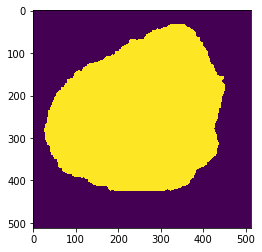

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x1, interpolation='nearest')
plt.show()

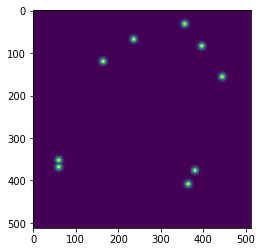

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x2, interpolation='nearest')
plt.show()

#This is the generated key patch map

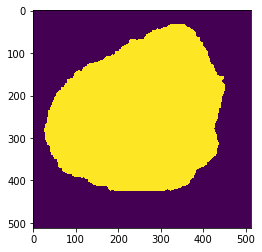

In [ ]:
#Original label (segmentation mask)

x=np.load('/content/drive/MyDrive/BAT_Resized_Data/Train/Label/0000000.npy')
plt.imshow(x, interpolation='nearest')
plt.show()

In [ ]:
!cp "/content/drive/MyDrive/Cell-DETR-master" -r "/lib" #ignore

Let us save all the key patch map (npy files) in the Train folder location.

In [ ]:
# import required module
import os
# assign directory
directory = '/content/drive/MyDrive/BAT_Resized_Data/Train/Label'

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(f)

In [ ]:
len(os.listdir(directory))

900

In [ ]:
# import required module
import os
# assign directory
directory = '/content/drive/MyDrive/BAT_Resized_Data/Train/Label'

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename) #f is filename
    _, kpm = kpm_gen(f,0,0)
    save_loc='/content/drive/MyDrive/BAT_Resized_Data/Train/Point/'+filename
    np.save(save_loc, kpm)

In [ ]:
directory_point = '/content/drive/MyDrive/BAT_Resized_Data/Train/Point'
print(len(os.listdir(directory_point)))

900


importing src.loadmodels

In [ ]:
import torch
import torch.nn as nn
from collections import OrderedDict


def load_model(model, pretrain_dir, log=True):
    state_dict_ = torch.load(pretrain_dir, map_location='cuda:0')
    print('loaded pretrained weights form %s !' % pretrain_dir)
    state_dict = OrderedDict()

    # convert data_parallal to model
    for key in state_dict_:
        if key.startswith('module') and not key.startswith('module_list'):
            state_dict[key[7:]] = state_dict_[key]
        else:
            state_dict[key] = state_dict_[key]

# check loaded parameters and created model parameters
    model_state_dict = model.state_dict()
    for key in state_dict:
        if key in model_state_dict:
            #       print(key,state_dict[key].shape,model_state_dict[key].shape)
            if state_dict[key].shape != model_state_dict[key].shape:
                if log:
                    print(
                        'Skip loading parameter {}, required shape{}, loaded shape{}.'
                        .format(key, model_state_dict[key].shape,
                                state_dict[key].shape))
                state_dict[key] = model_state_dict[key]
        else:
            if log:
                print('Drop parameter {}.'.format(key))
    for key in model_state_dict:
        if key not in state_dict:
            if log:
                print('No param {}.'.format(key))
            state_dict[key] = model_state_dict[key]
    model.load_state_dict(state_dict, strict=False)

    return model

importing loss.losses

In [ ]:
import torch
from torch.nn import functional as F
import numpy as np
from scipy.ndimage import distance_transform_edt as distance
from skimage import segmentation as skimage_seg


def dice_loss(score, target):
    target = target.float()
    smooth = 1e-5
    intersect = torch.sum(score * target)
    y_sum = torch.sum(target * target)
    z_sum = torch.sum(score * score)
    loss = (2 * intersect + smooth) / (z_sum + y_sum + smooth)
    loss = 1 - loss
    return loss


def ce_loss(pred, gt):
    pred = torch.clamp(pred, 1e-6, 1 - 1e-6)
    return (-gt * torch.log(pred) - (1 - gt) * torch.log(1 - pred)).mean()


def structure_loss(pred, mask):
    """            TransFuse train loss        """
    """            Without sigmoid             """
    weit = 1 + 5 * torch.abs(
        F.avg_pool2d(mask, kernel_size=31, stride=1, padding=15) - mask)
    wbce = F.binary_cross_entropy_with_logits(pred, mask, reduction='none')
    wbce = (weit * wbce).sum(dim=(2, 3)) / weit.sum(dim=(2, 3))

    pred = torch.sigmoid(pred)
    inter = ((pred * mask) * weit).sum(dim=(2, 3))
    union = ((pred + mask) * weit).sum(dim=(2, 3))
    wiou = 1 - (inter + 1) / (union - inter + 1)
    return (wbce + wiou).mean()


def focal_loss(
    inputs: torch.Tensor,
    targets: torch.Tensor,
    alpha: float = 0.8,
    gamma: float = 2,
    reduction: str = "mean",
) -> torch.Tensor:
    p = inputs
    ce_loss = F.binary_cross_entropy(inputs, targets, reduction="mean")
    p_t = p * targets + (1 - p) * (1 - targets)
    loss = ce_loss * ((1 - p_t)**gamma)

    if alpha >= 0:
        alpha_t = alpha * targets + (1 - alpha) * (1 - targets)
        loss = alpha_t * loss

    if reduction == "mean":
        loss = loss.mean()
    elif reduction == "sum":
        loss = loss.sum()

    return loss

train.py

In [ ]:
!pip install medpy

     |████████████████████████████████| 151 kB 5.4 MB/s 
     |████████████████████████████████| 48.4 MB 19 kB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754463 sha256=17feb4eb0fe1794cab15d004579328f3e3b8dab18c14f930087a1ee5adac093c
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


## Train.py starts

In [ ]:
import os, argparse, math
import numpy as np
from glob import glob
from tqdm import tqdm

import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torch.optim as optim

from medpy.metric.binary import hd, dc, assd, jc
from skimage import segmentation as skimage_seg
from scipy.ndimage import distance_transform_edt as distance
from torch.utils.tensorboard import SummaryWriter

from src.LoadModel import load_model
from loss.losses import dice_loss, ce_loss, structure_loss, focal_loss

from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR

In [ ]:
! pip install tensorboardX

     |████████████████████████████████| 124 kB 5.3 MB/s 


In [ ]:
%%writefile isbi2018.py

import os
import glob
import json
import torch
import random
import torch.nn as nn
import numpy as np
import torch.utils.data
from torchvision import transforms
import torch.utils.data as data
import torch.nn.functional as F

import albumentations as A


def norm01(x):
    return np.clip(x, 0, 255) / 255


seperable_indexes = json.load(open('/content/drive/MyDrive/BAT_Resized_Data/Dict_Folds.json', 'r'))


# cross validation
class myDataset(data.Dataset):
    def __init__(self, fold, split, aug=False):
        super(myDataset, self).__init__()
        self.split = split

        # load images, label, point
        self.image_paths = []
        self.label_paths = []
        self.point_paths = []
        self.dist_paths = []

        indexes = [
            l[:-4] for l in os.listdir('/content/drive/MyDrive/BAT_Resized_Data/Train/Image/')
        ]
        valid_indexes = seperable_indexes[fold]
        train_indexes = list(filter(lambda x: x not in valid_indexes, indexes))
        print('Fold {}: train: {} valid: {}'.format(fold, len(train_indexes),
                                                    len(valid_indexes)))

        if split == 'train':
            self.image_paths = [
                '/content/drive/MyDrive/BAT_Resized_Data/Train/Image/{}.npy'.format(_id)
                for _id in train_indexes
            ]
            self.label_paths = [
                '/content/drive/MyDrive/BAT_Resized_Data/Train/Label/{}.npy'.format(_id)
                for _id in train_indexes
            ]
            self.point_paths = [
                '/content/drive/MyDrive/BAT_Resized_Data/Train/Point/{}.npy'.format(_id)
                for _id in train_indexes
            ]
        elif split == 'valid':
            self.image_paths = [
                '/content/drive/MyDrive/BAT_Resized_Data/Train/Image/{}.npy'.format(_id)
                for _id in valid_indexes
            ]
            self.label_paths = [
                '/content/drive/MyDrive/BAT_Resized_Data/Train/Label/{}.npy'.format(_id)
                for _id in valid_indexes
            ]
            self.point_paths = [
                '/content/drive/MyDrive/BAT_Resized_Data/Train/Point/{}.npy'.format(_id)
                for _id in valid_indexes
            ]

        print('Loaded {} frames'.format(len(self.image_paths)))
        self.num_samples = len(self.image_paths)
        self.aug = aug

        p = 0.5
        self.transf = A.Compose([
            A.GaussNoise(p=p),
            A.HorizontalFlip(p=p),
            A.VerticalFlip(p=p),
            A.ShiftScaleRotate(p=p),
            #             A.RandomBrightnessContrast(p=p),
        ])

    def __getitem__(self, index):

        image_data = np.load(self.image_paths[index])
        label_data = np.load(self.label_paths[index]) > 0.5
        point_data = np.load(self.point_paths[index]) > 0.5

        if self.aug and self.split == 'train':
            mask = np.concatenate([
                label_data[..., np.newaxis].astype('uint8'),
                point_data[..., np.newaxis]
            ],
                                  axis=-1)
            tsf = self.transf(image=image_data.astype('uint8'), mask=mask)
            image_data, mask_aug = tsf['image'], tsf['mask']
            label_data = mask_aug[:, :, 0]
            point_data = mask_aug[:, :, 1]

        image_data = norm01(image_data)
        label_data = np.expand_dims(label_data, 0)
        point_data = np.expand_dims(point_data, 0)
        image_data = torch.from_numpy(image_data).float()
        label_data = torch.from_numpy(label_data).float()
        point_data = torch.from_numpy(point_data).float()

        image_data = image_data.permute(2, 0, 1)

        return {
            'image_path': self.image_paths[index],
            'label_path': self.label_paths[index],
            'point_path': self.point_paths[index],
            'image': image_data,
            'label': label_data,
            'point': point_data
        }

    def __len__(self):
        return self.num_samples


if __name__ == '__main__':
    from tqdm import tqdm
    dataset = myDataset(fold=0, split='train', aug=False)

    train_loader = torch.utils.data.DataLoader(dataset,
                                               batch_size=8,
                                               shuffle=False,
                                               num_workers=2,
                                               pin_memory=True,
                                               drop_last=True)
    for d in train_loader:
        pass

Writing isbi2018.py


In [ ]:
#ignore
%%writefile parsing.py
##### SCRIPT STARTS HERE #####
#!usr/bin/bash python

import isbi2018

from tensorboardX import SummaryWriter
import os, argparse, math
import numpy as np
from glob import glob
from tqdm import tqdm

import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torch.optim as optim

from medpy.metric.binary import hd, dc, assd, jc
from skimage import segmentation as skimage_seg
from scipy.ndimage import distance_transform_edt as distance
from torch.utils.tensorboard import SummaryWriter
parser = argparse.ArgumentParser()
parser.add_argument('--arch', type=str, default='Transformer')
parser.add_argument('--gpu', type=str, default='1')
parser.add_argument('--net_layer', type=int, default=50)
parser.add_argument('--dataset', type=str, default='isbi2018')
parser.add_argument('--exp_name', type=str, default='')
parser.add_argument('--fold', type=str, default='0')
parser.add_argument('--lr_seg', type=float, default=0.0003)
parser.add_argument('--n_epochs', type=int, default=100)
parser.add_argument('--bt_size', type=int, default=4)
parser.add_argument('--seg_loss', type=int, default=0, choices=[0, 1])
parser.add_argument('--aug', type=int, default=1)
parser.add_argument('--patience', type=int, default=50)

# using transformer
parser.add_argument('--trans', type=int, default=1)

# using key-patch map
parser.add_argument('--point_pred', type=int, default=0)

parse_config = parser.parse_args()


print(parse_config)

exp_name = parse_config.dataset + '/' + parse_config.exp_name + '_loss_' + str(
    parse_config.seg_loss) + '_aug_' + str(
        parse_config.aug) + '/' + parse_config.arch + '/fold_' + str(
            parse_config.fold)

os.makedirs('logs/{}'.format(exp_name), exist_ok=True)
os.makedirs('logs/{}/model'.format(exp_name), exist_ok=True)
writer = SummaryWriter('logs/{}/log'.format(exp_name))
save_path = 'logs/{}/model/best.pkl'.format(exp_name)
latest_path = 'logs/{}/model/latest.pkl'.format(exp_name)

EPOCHS = parse_config.n_epochs
os.environ['CUDA_VISIBLE_DEVICES'] = parse_config.gpu
device_ids = range(torch.cuda.device_count())
# define the data loader

if parse_config.dataset == 'isbi2018':
    from isbi2018 import norm01, myDataset
    dataset = myDataset(fold=parse_config.fold,
                        split='train',
                        aug=parse_config.aug)
    dataset2 = myDataset(fold=parse_config.fold, split='valid', aug=False)

elif parse_config.dataset == 'isbi2016':
    from dataset.isbi2016 import norm01, myDataset
    dataset = myDataset(split='train', aug=parse_config.aug)
    dataset2 = myDataset(split='valid', aug=False)

Overwriting parsing.py


In [ ]:
def to_execute(): #ignore
    import isbi2018

    from tensorboardX import SummaryWriter
    import os
    import argparse
    import math
    import numpy as np
    from glob import glob
    from tqdm import tqdm

    import torch.nn as nn


    parser = argparse.ArgumentParser()
    parser.add_argument('--arch', type=str, default='Transformer')
    parser.add_argument('--gpu', type=str, default='1')
    parser.add_argument('--net_layer', type=int, default=50)
    parser.add_argument('--dataset', type=str, default='isbi2018')
    parser.add_argument('--exp_name', type=str, default='')
    parser.add_argument('--fold', type=str, default='0')
    parser.add_argument('--lr_seg', type=float, default=0.0003)
    parser.add_argument('--n_epochs', type=int, default=100)
    parser.add_argument('--bt_size', type=int, default=4)
    parser.add_argument('--seg_loss', type=int, default=0, choices=[0, 1])
    parser.add_argument('--aug', type=int, default=1)
    parser.add_argument('--patience', type=int, default=50)

    # using transformer
    parser.add_argument('--trans', type=int, default=1)

    # using key-patch map
    parser.add_argument('--point_pred', type=int, default=0)

    parse_config = parser.parse_args()


    print(parse_config)

    exp_name = parse_config.dataset + '/' + parse_config.exp_name + '_loss_' + str(
        parse_config.seg_loss) + '_aug_' + str(
            parse_config.aug) + '/' + parse_config.arch + '/fold_' + str(
                parse_config.fold)

    os.makedirs('logs/{}'.format(exp_name), exist_ok=True)
    os.makedirs('logs/{}/model'.format(exp_name), exist_ok=True)
    writer = SummaryWriter('logs/{}/log'.format(exp_name))
    save_path = 'logs/{}/model/best.pkl'.format(exp_name)
    latest_path = 'logs/{}/model/latest.pkl'.format(exp_name)

    EPOCHS = parse_config.n_epochs
    os.environ['CUDA_VISIBLE_DEVICES'] = parse_config.gpu
    device_ids = range(torch.cuda.device_count())
    # define the data loader

    if parse_config.dataset == 'isbi2018':
        from isbi2018 import norm01, myDataset
        dataset = myDataset(fold=parse_config.fold,
                        split='train',
                        aug=parse_config.aug)
        dataset2 = myDataset(fold=parse_config.fold, split='valid', aug=False)

    elif parse_config.dataset == 'isbi2016':
        from dataset.isbi2016 import norm01, myDataset
        dataset = myDataset(split='train', aug=parse_config.aug)
        dataset2 = myDataset(split='valid', aug=False)


In [ ]:
!python3 parsing.py #ignore

Namespace(arch='Transformer', aug=1, bt_size=4, dataset='isbi2018', exp_name='', fold='0', gpu='1', lr_seg=0.0003, n_epochs=100, net_layer=50, patience=50, point_pred=0, seg_loss=0, trans=1)
Fold 0: train: 800 valid: 100
Loaded 800 frames
Fold 0: train: 800 valid: 100
Loaded 100 frames


In [ ]:
to_execute() #ignore

usage: ipykernel_launcher.py [-h] [--arch ARCH] [--gpu GPU]
                             [--net_layer NET_LAYER] [--dataset DATASET]
                             [--exp_name EXP_NAME] [--fold FOLD]
                             [--lr_seg LR_SEG] [--n_epochs N_EPOCHS]
                             [--bt_size BT_SIZE] [--seg_loss {0,1}]
                             [--aug AUG] [--patience PATIENCE] [--trans TRANS]
                             [--point_pred POINT_PRED]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-44efd520-36ce-4dfe-b9e8-6370a31975a8.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from dataset.isbi2018 import norm01, myDataset
dataset = myDataset(fold='0',split='train',aug='1')
dataset2 = myDataset(fold='0', split='valid', aug=False)

Fold 0: train: 800 valid: 100
Loaded 800 frames
Fold 0: train: 800 valid: 100
Loaded 100 frames


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset,
                                           batch_size=4,
                                           shuffle=True,
                                           num_workers=2,
                                           pin_memory=True,
                                           drop_last=True)
valid_loader = torch.utils.data.DataLoader(dataset2,
                                           batch_size=1,
                                           shuffle=False,
                                           num_workers=2,
                                           pin_memory=True,
                                           drop_last=False)

In [ ]:
exp_name = 'isbi2018' + '/' + '' + '_loss_' + str(1) + '_aug_' + str(1) + '/' + 'Transformer' + '/fold_' + str(0)

os.makedirs('logs/{}'.format(exp_name), exist_ok=True)
os.makedirs('logs/{}/model'.format(exp_name), exist_ok=True)
writer = SummaryWriter('logs/{}/log'.format(exp_name))
save_path = 'logs/{}/model/best.pkl'.format(exp_name)
latest_path = 'logs/{}/model/latest.pkl'.format(exp_name)

EPOCHS = 4       #parse_config.n_epochs
#os.environ['CUDA_VISIBLE_DEVICES'] = '1'
#device_ids = range(torch.cuda.device_count())
    # define the data loader

(IMPORTING AND DEBUGGING)

In [ ]:
import sys, os

#root_path = os.path.join(os.path.dirname(os.path.abspath(__file__)), '..')
#sys.path.insert(0, os.path.join(root_path))

import torch
import torch.nn as nn
import torch.nn.functional as F

from models.utils.segmentation import MultiHeadAttention

In [ ]:
from typing import Type, Tuple

import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttention(nn.Module):
    """
    This class implements a multi head attention module like proposed in:
    https://arxiv.org/abs/2005.12872
    """

    def __init__(self, query_dimension: int = 64, hidden_features: int = 64, number_of_heads: int = 16,
                 dropout: float = 0.0, feature_length: int = 32*32) -> None:
        """
        Constructor method
        :param query_dimension: (int) Dimension of query tensor
        :param hidden_features: (int) Number of hidden features in detr
        :param number_of_heads: (int) Number of prediction heads
        :param dropout: (float) Dropout factor to be utilized
        """
        # Call super constructor
        super(MultiHeadAttention, self).__init__()
        # Save parameters
        self.hidden_features = hidden_features
        self.number_of_heads = number_of_heads
        self.dropout = dropout
        # Init layer
        self.layer_box_embedding = nn.Linear(in_features=query_dimension, out_features=hidden_features, bias=True)
        # Init convolution layer
        self.layer_image_encoding = nn.Conv2d(in_channels=query_dimension, out_channels=hidden_features,
                                              kernel_size=(1, 1), stride=(1, 1), padding=(0, 0), bias=True)
        # Init normalization factor
        self.normalization_factor = torch.tensor(self.hidden_features / self.number_of_heads, dtype=torch.float).sqrt()

        # Linear
        self.linear = nn.Linear(in_features=number_of_heads, out_features=1)
        #self.linear = nn.Conv1d(number_of_heads, 1, kernel_size=1)

    def forward(self, input_box_embeddings: torch.Tensor, input_image_encoding: torch.Tensor) -> torch.Tensor:
        """
        Forward pass
        :param input_box_embeddings: (torch.Tensor) Bounding box embeddings
        :param input_image_encoding: (torch.Tensor) Encoded image of the transformer encoder
        :return: (torch.Tensor) Attention maps of shape (batch size, n, m, height, width)
        """
        # Map box embeddings
        output_box_embeddings = self.layer_box_embedding(input_box_embeddings)
        # Map image features
        output_image_encoding = self.layer_image_encoding(input_image_encoding)
        # Reshape output box embeddings
        output_box_embeddings = output_box_embeddings.view(output_box_embeddings.shape[0],
                                                           output_box_embeddings.shape[1],
                                                           self.number_of_heads,
                                                           self.hidden_features // self.number_of_heads)
        # Reshape output image encoding
        output_image_encoding = output_image_encoding.view(output_image_encoding.shape[0],
                                                           self.number_of_heads,
                                                           self.hidden_features // self.number_of_heads,
                                                           output_image_encoding.shape[-2],
                                                           output_image_encoding.shape[-1])
        # Combine tensors and normalize
        output = torch.einsum("bqnc,bnchw->bqnhw",
                              output_box_embeddings * self.normalization_factor,
                              output_image_encoding)
        # Apply softmax
        output = F.softmax(output.flatten(start_dim=2), dim=-1).view_as(output)

        # Linear: to generate one map
        b, _, _, h, w = output.shape
        output = torch.sigmoid(self.linear(output.flatten(start_dim=3).permute(0,1,3,2))).view(b,1,h,w)

        # Perform dropout if utilized
        if self.dropout > 0.0:
            output = F.dropout(input=output, p=self.dropout, training=self.training)
#         print("MultiHead Attention",output.shape)
        return output.squeeze(3).contiguous()

from models.utils.resnet import ResNet50_OS16, ResNet18_OS8

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models


def make_layer(block, in_channels, channels, num_blocks, stride=1, dilation=1):
    strides = [
        stride
    ] + [1] * (num_blocks - 1
               )  # (stride == 2, num_blocks == 4 --> strides == [2, 1, 1, 1])

    blocks = []
    for stride in strides:
        blocks.append(
            block(in_channels=in_channels,
                  channels=channels,
                  stride=stride,
                  dilation=dilation))
        in_channels = block.expansion * channels

    layer = nn.Sequential(
        *blocks)  # (*blocks: call with unpacked list entires as arguments)

    return layer


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, channels, stride=1, dilation=1):
        super(BasicBlock, self).__init__()

        out_channels = self.expansion * channels

        self.conv1 = nn.Conv2d(in_channels,
                               channels,
                               kernel_size=3,
                               stride=stride,
                               padding=dilation,
                               dilation=dilation,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(channels)

        self.conv2 = nn.Conv2d(channels,
                               channels,
                               kernel_size=3,
                               stride=1,
                               padding=dilation,
                               dilation=dilation,
                               bias=False)
        self.bn2 = nn.BatchNorm2d(channels)

        if (stride != 1) or (in_channels != out_channels):
            conv = nn.Conv2d(in_channels,
                             out_channels,
                             kernel_size=1,
                             stride=stride,
                             bias=False)
            bn = nn.BatchNorm2d(out_channels)
            self.downsample = nn.Sequential(conv, bn)
        else:
            self.downsample = nn.Sequential()

    def forward(self, x):
        # (x has shape: (batch_size, in_channels, h, w))

        out = F.relu(
            self.bn1(self.conv1(x))
        )  # (shape: (batch_size, channels, h, w) if stride == 1, (batch_size, channels, h/2, w/2) if stride == 2)
        out = self.bn2(
            self.conv2(out)
        )  # (shape: (batch_size, channels, h, w) if stride == 1, (batch_size, channels, h/2, w/2) if stride == 2)

        out = out + self.downsample(
            x
        )  # (shape: (batch_size, channels, h, w) if stride == 1, (batch_size, channels, h/2, w/2) if stride == 2)

        out = F.relu(
            out
        )  # (shape: (batch_size, channels, h, w) if stride == 1, (batch_size, channels, h/2, w/2) if stride == 2)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_channels, channels, stride=1, dilation=1):
        super(Bottleneck, self).__init__()

        out_channels = self.expansion * channels

        self.conv1 = nn.Conv2d(in_channels,
                               channels,
                               kernel_size=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(channels)

        self.conv2 = nn.Conv2d(channels,
                               channels,
                               kernel_size=3,
                               stride=stride,
                               padding=dilation,
                               dilation=dilation,
                               bias=False)
        self.bn2 = nn.BatchNorm2d(channels)

        self.conv3 = nn.Conv2d(channels,
                               out_channels,
                               kernel_size=1,
                               bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)

        if (stride != 1) or (in_channels != out_channels):
            conv = nn.Conv2d(in_channels,
                             out_channels,
                             kernel_size=1,
                             stride=stride,
                             bias=False)
            bn = nn.BatchNorm2d(out_channels)
            self.downsample = nn.Sequential(conv, bn)
        else:
            self.downsample = nn.Sequential()

    def forward(self, x):
        # (x has shape: (batch_size, in_channels, h, w))

        out = F.relu(self.bn1(
            self.conv1(x)))  # (shape: (batch_size, channels, h, w))
        out = F.relu(
            self.bn2(self.conv2(out))
        )  # (shape: (batch_size, channels, h, w) if stride == 1, (batch_size, channels, h/2, w/2) if stride == 2)
        out = self.bn3(
            self.conv3(out)
        )  # (shape: (batch_size, out_channels, h, w) if stride == 1, (batch_size, out_channels, h/2, w/2) if stride == 2)

        out = out + self.downsample(
            x
        )  # (shape: (batch_size, out_channels, h, w) if stride == 1, (batch_size, out_channels, h/2, w/2) if stride == 2)

        out = F.relu(
            out
        )  # (shape: (batch_size, out_channels, h, w) if stride == 1, (batch_size, out_channels, h/2, w/2) if stride == 2)

        return out


class ResNet_Bottleneck_OS16(nn.Module):
    def __init__(self, num_layers):
        super(ResNet_Bottleneck_OS16, self).__init__()

        if num_layers == 50:
            resnet = models.resnet50()
            # load pretrained model:
            resnet.load_state_dict(
                torch.load(
                    "/content/drive/MyDrive/BAT_Resized_Data/Pretrained Models/resnet50-19c8e357.pth")
            )
            # remove fully connected layer, avg pool and layer5:
            self.resnet = nn.Sequential(*list(resnet.children())[:-3])

            print("pretrained resnet, 50")
        else:
            raise Exception("num_layers must be in {50, 101, 152}!")

        self.layer5 = make_layer(Bottleneck,
                                 in_channels=4 * 256,
                                 channels=512,
                                 num_blocks=3,
                                 stride=1,
                                 dilation=2)

    def forward(self, x):
        # (x has shape (batch_size, 3, h, w))

        # pass x through (parts of) the pretrained ResNet:
        c4 = self.resnet(
            x
        )  # (shape: (batch_size, 4*256, h/16, w/16)) (it's called c4 since 16 == 2^4)

        output = self.layer5(c4)  # (shape: (batch_size, 4*512, h/16, w/16))

        return output


class ResNet_BasicBlock_OS16(nn.Module):
    def __init__(self, num_layers):
        super(ResNet_BasicBlock_OS16, self).__init__()

        if num_layers == 18:
            resnet = models.resnet18()
            #             load pretrained model:
            resnet.load_state_dict(
                torch.load("/content/drive/MyDrive/BAT_Resized_Data/Pretrained Models /resnet18-5c106cde.pth"))
            # remove fully connected layer, avg pool and layer5:
            self.resnet = nn.Sequential(*list(resnet.children())[:-3])

            num_blocks = 2
            print("pretrained resnet, 18")
        else:
            raise Exception("num_layers must be in {18, 34}!")

        self.layer5 = make_layer(BasicBlock,
                                 in_channels=256,
                                 channels=512,
                                 num_blocks=num_blocks,
                                 stride=1,
                                 dilation=2)

    def forward(self, x):
        # (x has shape (batch_size, 3, h, w))

        # pass x through (parts of) the pretrained ResNet:
        c4 = self.resnet(
            x
        )  # (shape: (batch_size, 256, h/16, w/16)) (it's called c4 since 16 == 2^4)
        output = self.layer5(c4)  # (shape: (batch_size, 512, h/16, w/16))

        return output


class ResNet_BasicBlock_OS8(nn.Module):
    def __init__(self, num_layers):
        super(ResNet_BasicBlock_OS8, self).__init__()

        if num_layers == 18:
            resnet = models.resnet18()
            # load pretrained model:
            resnet.load_state_dict(
                torch.load("/content/drive/MyDrive/BAT_Resized_Data/Pretrained Models /resnet18-5c106cde.pth"))
            # remove fully connected layer, avg pool, layer4 and layer5:
            self.resnet = nn.Sequential(*list(resnet.children())[:-4])

            num_blocks_layer_4 = 2
            num_blocks_layer_5 = 2
            print("pretrained resnet, 18")
        else:
            raise Exception("num_layers must be in {18, 34}!")

        self.layer4 = make_layer(BasicBlock,
                                 in_channels=128,
                                 channels=256,
                                 num_blocks=num_blocks_layer_4,
                                 stride=1,
                                 dilation=2)

        self.layer5 = make_layer(BasicBlock,
                                 in_channels=256,
                                 channels=512,
                                 num_blocks=num_blocks_layer_5,
                                 stride=1,
                                 dilation=4)

    def forward(self, x):
        # (x has shape (batch_size, 3, h, w))

        # pass x through (parts of) the pretrained ResNet:
        c3 = self.resnet(
            x
        )  # (shape: (batch_size, 128, h/8, w/8)) (it's called c3 since 8 == 2^3)

        output = self.layer4(c3)  # (shape: (batch_size, 256, h/8, w/8))
        output = self.layer5(output)  # (shape: (batch_size, 512, h/8, w/8))

        return output


In [ ]:
def ResNet50_OS16():
    return ResNet_Bottleneck_OS16(num_layers=50)

def ResNet18_OS8():
    return ResNet_BasicBlock_OS8(num_layers=18)

from models.utils.ASPP import ASPP, ASPP_Bottleneck

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ASPP(nn.Module):
    def __init__(self, num_classes, head = True):
        super(ASPP, self).__init__()

        self.conv_1x1_1 = nn.Conv2d(512, 256, kernel_size=1)
        self.bn_conv_1x1_1 = nn.BatchNorm2d(256)

        self.conv_3x3_1 = nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=6, dilation=6)
        self.bn_conv_3x3_1 = nn.BatchNorm2d(256)

        self.conv_3x3_2 = nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=12, dilation=12)
        self.bn_conv_3x3_2 = nn.BatchNorm2d(256)

        self.conv_3x3_3 = nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=18, dilation=18)
        self.bn_conv_3x3_3 = nn.BatchNorm2d(256)

        self.avg_pool = nn.AdaptiveAvgPool2d(1)

        self.conv_1x1_2 = nn.Conv2d(512, 256, kernel_size=1)
        self.bn_conv_1x1_2 = nn.BatchNorm2d(256)

        self.conv_1x1_3 = nn.Conv2d(1280, 256, kernel_size=1) # (1280 = 5*256)
        self.bn_conv_1x1_3 = nn.BatchNorm2d(256)

        if head:
            self.conv_1x1_4 = nn.Conv2d(256, num_classes, kernel_size=1)
        self.head = head

    def forward(self, feature_map):
        # (feature_map has shape (batch_size, 512, h/16, w/16)) (assuming self.resnet is ResNet18_OS16 or ResNet34_OS16. If self.resnet instead is ResNet18_OS8 or ResNet34_OS8, it will be (batch_size, 512, h/8, w/8))

        feature_map_h = feature_map.size()[2] # (== h/16)
        feature_map_w = feature_map.size()[3] # (== w/16)

        out_1x1 = F.relu(self.bn_conv_1x1_1(self.conv_1x1_1(feature_map))) # (shape: (batch_size, 256, h/16, w/16))
        out_3x3_1 = F.relu(self.bn_conv_3x3_1(self.conv_3x3_1(feature_map))) # (shape: (batch_size, 256, h/16, w/16))
        out_3x3_2 = F.relu(self.bn_conv_3x3_2(self.conv_3x3_2(feature_map))) # (shape: (batch_size, 256, h/16, w/16))
        out_3x3_3 = F.relu(self.bn_conv_3x3_3(self.conv_3x3_3(feature_map))) # (shape: (batch_size, 256, h/16, w/16))

        out_img = self.avg_pool(feature_map) # (shape: (batch_size, 512, 1, 1))
        out_img = F.relu(self.bn_conv_1x1_2(self.conv_1x1_2(out_img))) # (shape: (batch_size, 256, 1, 1))
        out_img = F.interpolate(out_img, size=(feature_map_h, feature_map_w), mode="bilinear") # (shape: (batch_size, 256, h/16, w/16))

        out = torch.cat([out_1x1, out_3x3_1, out_3x3_2, out_3x3_3, out_img], 1) # (shape: (batch_size, 1280, h/16, w/16))
        out = F.relu(self.bn_conv_1x1_3(self.conv_1x1_3(out))) # (shape: (batch_size, 256, h/16, w/16))
        if self.head:
            out = self.conv_1x1_4(out) # (shape: (batch_size, num_classes, h/16, w/16))

        return out

class ASPP_Bottleneck(nn.Module):
    def __init__(self, num_classes):
        super(ASPP_Bottleneck, self).__init__()

        self.conv_1x1_1 = nn.Conv2d(4*512, 256, kernel_size=1)
        self.bn_conv_1x1_1 = nn.BatchNorm2d(256)

        self.conv_3x3_1 = nn.Conv2d(4*512, 256, kernel_size=3, stride=1, padding=6, dilation=6)
        self.bn_conv_3x3_1 = nn.BatchNorm2d(256)

        self.conv_3x3_2 = nn.Conv2d(4*512, 256, kernel_size=3, stride=1, padding=12, dilation=12)
        self.bn_conv_3x3_2 = nn.BatchNorm2d(256)

        self.conv_3x3_3 = nn.Conv2d(4*512, 256, kernel_size=3, stride=1, padding=18, dilation=18)
        self.bn_conv_3x3_3 = nn.BatchNorm2d(256)

        self.avg_pool = nn.AdaptiveAvgPool2d(1)

        self.conv_1x1_2 = nn.Conv2d(4*512, 256, kernel_size=1)
        self.bn_conv_1x1_2 = nn.BatchNorm2d(256)

        self.conv_1x1_3 = nn.Conv2d(1280, 256, kernel_size=1) # (1280 = 5*256)
        self.bn_conv_1x1_3 = nn.BatchNorm2d(256)

        self.conv_1x1_4 = nn.Conv2d(256, num_classes, kernel_size=1)

    def forward(self, feature_map):
        # (feature_map has shape (batch_size, 4*512, h/16, w/16))

        feature_map_h = feature_map.size()[2] # (== h/16)
        feature_map_w = feature_map.size()[3] # (== w/16)

        out_1x1 = F.relu(self.bn_conv_1x1_1(self.conv_1x1_1(feature_map))) # (shape: (batch_size, 256, h/16, w/16))
        out_3x3_1 = F.relu(self.bn_conv_3x3_1(self.conv_3x3_1(feature_map))) # (shape: (batch_size, 256, h/16, w/16))
        out_3x3_2 = F.relu(self.bn_conv_3x3_2(self.conv_3x3_2(feature_map))) # (shape: (batch_size, 256, h/16, w/16))
        out_3x3_3 = F.relu(self.bn_conv_3x3_3(self.conv_3x3_3(feature_map))) # (shape: (batch_size, 256, h/16, w/16))

        out_img = self.avg_pool(feature_map) # (shape: (batch_size, 512, 1, 1))
        out_img = F.relu(self.bn_conv_1x1_2(self.conv_1x1_2(out_img))) # (shape: (batch_size, 256, 1, 1))
        out_img = F.interpolate(out_img, size=(feature_map_h, feature_map_w), mode="bilinear") # (shape: (batch_size, 256, h/16, w/16))

        out = torch.cat([out_1x1, out_3x3_1, out_3x3_2, out_3x3_3, out_img], 1) # (shape: (batch_size, 1280, h/16, w/16))
        out = F.relu(self.bn_conv_1x1_3(self.conv_1x1_3(out))) # (shape: (batch_size, 256, h/16, w/16))
        out = self.conv_1x1_4(out) # (shape: (batch_size, num_classes, h/16, w/16))

        return out


from models.Base import DeepLabV3 as base

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import sys

In [ ]:
class DeepLabV3(nn.Module):
    def __init__(self, num_classes, num_layers):
        super(DeepLabV3, self).__init__()

        self.num_classes = num_classes
        layers = num_layers
        # NOTE! specify the type of ResNet here
        # NOTE! if you use ResNet50-152, set self.aspp = ASPP_Bottleneck(num_classes=self.num_classes) instead
        if layers==18:
            self.resnet = ResNet18_OS8()
            self.aspp = ASPP(num_classes=self.num_classes)
        elif layers==50:
            self.resnet = ResNet50_OS16()
            self.aspp = ASPP_Bottleneck(num_classes=self.num_classes)

    def forward(self, x):
        # (x has shape (batch_size, 3, h, w))
        h = x.size()[2]
        w = x.size()[3]
        feature_map = self.resnet(x)

        # (shape: (batch_size, 512, h/16, w/16)) (assuming self.resnet is ResNet18_OS16 or ResNet34_OS16.
        # If self.resnet is ResNet18_OS8 or ResNet34_OS8, it will be (batch_size, 512, h/8, w/8).
        # If self.resnet is ResNet50-152, it will be (batch_size, 4*512, h/16, w/16))
        output = self.aspp(feature_map) # (shape: (batch_size, num_classes, h/16, w/16))
        output = F.upsample(output, size=(h, w), mode="bilinear") # (shape: (batch_size, num_classes, h, w))
        return output

from models.transformers.Cell_DETR import cell_detr_128

In [ ]:
######
### CHANGING BASE DIRECTORY TO BA-TRANSFORMER DIRECTORY IN DRIVE
######

import os
os.chdir("/content/drive/MyDrive/BA-Transformer")

In [ ]:
from models.transformers.Cell_DETR import cell_detr_128

In [ ]:
!pip install timm

     |████████████████████████████████| 376 kB 3.2 MB/s 


In [ ]:
from models.transformers.DETR import detr_base_256

from models.BAT import BAT

## resume training

In [ ]:
pip install torch==1.7.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.3 MB 25 kB/s 
     |████████████████████████████████| 6.6 MB 40.2 MB/s 
INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install torch==1.7.0+cu101 and torchvision==0.6.0+cu101 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested torch==1.7.0+cu101
    torchvision 0.6.0+cu101 depends on torch==1.5.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/user_guid

In [ ]:
!nvidia-smi

Sun Dec 12 14:58:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()
# Output would be True if Pytorch is using GPU otherwise it would be False.

True

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
# Standard output is '/device:GPU:0'

''

In [ ]:

# define the model

#if parse_config.arch is 'Transformer':
from models.BAT import BAT
model = BAT(1, 50).cuda()

pretrained resnet, 50


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), 0.0003) #0.0003 is learning rate (lr)

scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=10)

criteon = [dice_loss, ce_loss][0] # 0 here is seg_loss in parse_config

In [ ]:
%cd ../

/content/drive/My Drive


In [ ]:
%cd ../

/content/drive


In [ ]:
%cd ../

/content


In [ ]:
%cd ../

/


In [ ]:
arch='Transformer'
net_layer=50
point_pred=1
gpu='1'
fold='0'
lr_seg=0.0003
n_epochs=4
bt_size=4
seg_loss=0
aug=1
patience=50
trans=1

In [ ]:
##############################

def train(epoch):
    model.train()
    for batch_idx, batch_data in enumerate(train_loader):
        data = batch_data['image'].cuda().float()
        label = batch_data['label'].cuda().float()
        point = (batch_data['point'] > 0).cuda().float()

        #Hyperparameters
        arch='Transformer'
        net_layer=50
        point_pred=1

        if net_layer == 18:
            point = nn.functional.max_pool2d(point,
                                             kernel_size=(8, 8),
                                             stride=(8, 8))
        else:
            point = nn.functional.max_pool2d(point,
                                             kernel_size=(16, 16),
                                             stride=(16, 16))

        if arch == 'transfuse':
            lateral_map_4, lateral_map_3, lateral_map_2 = model(data)

            loss4 = structure_loss(lateral_map_4, label)
            loss3 = structure_loss(lateral_map_3, label)
            loss2 = structure_loss(lateral_map_2, label)

            loss = 0.5 * loss2 + 0.3 * loss3 + 0.2 * loss4

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (batch_idx + 1) % 10 == 0:
                writer.add_scalar('loss/loss_4', loss4,
                                  batch_idx + epoch * len(train_loader))
                writer.add_scalar('loss/loss_3', loss3,
                                  batch_idx + epoch * len(train_loader))
                writer.add_scalar('loss/loss_2', loss2,
                                  batch_idx + epoch * len(train_loader))
                writer.add_scalar('loss/loss', loss,
                                  batch_idx + epoch * len(train_loader))
                print(
                    'Train Epoch: {} [{}/{} ({:.0f}%)]\t[lateral-2: {:.4f}, lateral-3: {:0.4f}, lateral-4: {:0.4f}]'
                    .format(epoch, batch_idx * len(data),
                            len(train_loader.dataset),
                            100. * batch_idx / len(train_loader), loss2.item(),
                            loss3.item(), loss4.item()))

        elif point_pred == 0:
            output = model(data)
            output = torch.sigmoid(output)

            loss = criteon(output, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (batch_idx + 1) % 10 == 0:
                writer.add_scalar('loss/loss', loss,
                                  batch_idx + epoch * len(train_loader))
                writer.add_image('label', label[0],
                                 batch_idx + epoch * len(train_loader))
                writer.add_image('output', output[0] > 0.5,
                                 batch_idx + epoch * len(train_loader))

                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))

        elif point_pred == 1:
            output, point_maps_pre = model(data)
            output = torch.sigmoid(output)

            assert (output.shape == label.shape)
            loss_dc = criteon(output, label)
            assert (point_maps_pre[-1].shape == point.shape)
            point_loss = 0.
            for i in range(len(point_maps_pre) - 1):
                point_loss += focal_loss(point_maps_pre[i], point)
            point_loss = 1.0 / len(point_maps_pre) * (
                point_loss + focal_loss(point_maps_pre[-1], point))

            loss = loss_dc + 3 * point_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (batch_idx + 1) % 10 == 0:
                writer.add_scalar('loss/dc_loss', loss_dc,
                                  batch_idx + epoch * len(train_loader))
                writer.add_scalar('loss/point_loss', point_loss,
                                  batch_idx + epoch * len(train_loader))
                writer.add_scalar('loss/loss', loss,
                                  batch_idx + epoch * len(train_loader))

                writer.add_image('label', label[0],
                                 batch_idx + epoch * len(train_loader))
                writer.add_image('output', output[0] > 0.5,
                                 batch_idx + epoch * len(train_loader))
                writer.add_image('point_pre', point_maps_pre[-1][0],
                                 batch_idx + epoch * len(train_loader))

                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))


def evaluation(epoch, loader):
    model.eval()
    dice_value = 0
    dice_average = 0
    numm = 0
    for batch_idx, batch_data in enumerate(loader):
        data = batch_data['image'].cuda().float()
        label = batch_data['label'].cuda().float()
        point = (batch_data['point'] > 0).cuda().float()
        point = nn.functional.max_pool2d(point,
                                         kernel_size=(16, 16),
                                         stride=(16, 16))

        with torch.no_grad():
            if arch == 'transfuse':
                _, _, output = model(data)
                loss_fuse = structure_loss(output, label)
            elif point_pred == 0:
                output = model(data)
            elif point_pred == 1:
                output, point_maps_pre = model(data)
                point_loss = 0.
                for i in range(len(point_maps_pre) - 1):
                    point_loss += focal_loss(point_maps_pre[i], point)
                point_loss = 1.0 / len(point_maps_pre) * (
                    point_loss + focal_loss(point_maps_pre[-1], point))

            output = torch.sigmoid(output)

            loss_dc = criteon(output, label)

            if arch == 'transfuse':
                loss = loss_fuse
            elif arch == 'transunet':
                loss = 0.5 * loss_dc + 0.5 * ce_loss(output, label)
            elif point_pred == 0:
                loss = loss_dc
            elif point_pred == 1:
                loss = loss_dc + 3 * point_loss

            output = output.cpu().numpy() > 0.5

        label = label.cpu().numpy()
        assert (output.shape == label.shape)
        dice_ave = dc(output, label)
        dice_value += dice_ave
        numm += 1

    dice_average = dice_value / numm
    writer.add_scalar('valid_dice', dice_average, epoch)
    print("Average dice value of evaluation dataset = ", dice_average)
    return dice_average, loss


max_dice = 0
best_ep = 0
for epoch in range(1, EPOCHS + 1):
    train(epoch)
    dice, valid_loss = evaluation(epoch, valid_loader)
    scheduler.step(valid_loss)

    if dice > max_dice:
        max_dice = dice
        best_ep = epoch
        torch.save(model.state_dict(), save_path)
    else:
        if epoch - best_ep >= 50: #50 is variable 'patience' in parse_config
            print('Early stopping!')
            break
    torch.save(model.state_dict(), '/content/drive/MyDrive/BAT_Resized_Data/saved_model.pth')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Train Epoch: 1 [36/800 (4%)]	Loss: 0.298300
Train Epoch: 1 [76/800 (10%)]	Loss: 0.169349
Train Epoch: 1 [116/800 (14%)]	Loss: 0.163636
Train Epoch: 1 [156/800 (20%)]	Loss: 0.275620
Train Epoch: 1 [196/800 (24%)]	Loss: 0.236486
Train Epoch: 1 [236/800 (30%)]	Loss: 0.142783
Train Epoch: 1 [276/800 (34%)]	Loss: 0.131415
Train Epoch: 1 [316/800 (40%)]	Loss: 0.133474
Train Epoch: 1 [356/800 (44%)]	Loss: 0.457760
Train Epoch: 1 [396/800 (50%)]	Loss: 0.165475
Train Epoch: 1 [436/800 (54%)]	Loss: 0.171233
Train Epoch: 1 [476/800 (60%)]	Loss: 0.160820
Train Epoch: 1 [516/800 (64%)]	Loss: 0.145847
Train Epoch: 1 [556/800 (70%)]	Loss: 0.113692
Train Epoch: 1 [596/800 (74%)]	Loss: 0.139222
Train Epoch: 1 [636/800 (80%)]	Loss: 0.272968
Train Epoch: 1 [676/800 (84%)]	Loss: 0.170984
Train Epoch: 1 [716/800 (90%)]	Loss: 0.102744
Train Epoch: 1 [756/800 (94%)]	Loss: 0.233217
Train Epoch: 1 [796/800 (100%)]	Loss: 0.112544
Average dice value of evaluation dataset =  0.9020893776381383
Train Epoch: 2 [36/

RESNET.PY:

## Testing.py

The github repo has been edited. Cloning the new repo into a folder called New_BA_Transformer_Git.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/New_BA_Transformer_Git/')

In [ ]:
!git clone https://github.com/jcwang123/BA-Transformer

Cloning into 'BA-Transformer'...
remote: Enumerating objects: 330, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 330 (delta 125), reused 260 (delta 67), pack-reused 0
Receiving objects: 100% (330/330), 15.30 MiB | 13.58 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [ ]:
import os
os.chdir('/content/drive/MyDrive/New_BA_Transformer_Git/BA-Transformer')

In [ ]:
!pwd

/content/drive/MyDrive/New_BA_Transformer_Git/BA-Transformer


In [ ]:
# testing use of copyfile. ignore.

from shutil import copyfile
copyfile('/content/drive/MyDrive/BAT_Resized_Data/Train/Image/0000000.npy', '/content/drive/MyDrive/BAT_Resized_Data/Test/Image/0000000.npy')

'/content/drive/MyDrive/BAT_Resized_Data/Test/Image/0000000.npy'

Copying all fold-0 files to test set

In [ ]:
import json
idxs= json.load(open('/content/drive/MyDrive/BAT_Resized_Data/Dict_Folds.json', 'r'))

In [ ]:
print(type(idxs['0']))

<class 'list'>


In [ ]:
list_of_idx=idxs['0']

In [ ]:
print(list_of_idx)

['0000000', '0000001', '0000002', '0000004', '0000006', '0000007', '0000008', '0000009', '0000010', '0000011', '0000016', '0000017', '0000018', '0000019', '0000021', '0000024', '0000025', '0000026', '0000028', '0000029', '0000030', '0000031', '0000032', '0000034', '0000035', '0000038', '0000039', '0000041', '0000042', '0000044', '0000045', '0000046', '0000047', '0000048', '0000049', '0000050', '0000051', '0000054', '0000055', '0000058', '0000059', '0000060', '0000061', '0000062', '0000063', '0000065', '0000067', '0000068', '0000073', '0000074', '0000075', '0000077', '0000078', '0000079', '0000080', '0000081', '0000082', '0000085', '0000086', '0000087', '0000089', '0000091', '0000093', '0000094', '0000095', '0000096', '0000097', '0000100', '0000102', '0000103', '0000104', '0000105', '0000108', '0000109', '0000110', '0000112', '0000114', '0000116', '0000118', '0000119', '0000120', '0000121', '0000122', '0000123', '0000124', '0000127', '0000128', '0000130', '0000131', '0000133', '0000134'

In [ ]:
from shutil import copyfile
for num in list_of_idx:
  src_filename='/content/drive/MyDrive/BAT_Resized_Data/Train/Image/'+num+'.npy'
  dest_filename='/content/drive/MyDrive/BAT_Resized_Data/Test/Image/'+num+'.npy'
  copyfile(src_filename,dest_filename)

In [ ]:
len(list_of_idx)

100

In [ ]:
for num in list_of_idx:

  src_filename='/content/drive/MyDrive/BAT_Resized_Data/Train/Label/'+num+'.npy'
  dest_filename='/content/drive/MyDrive/BAT_Resized_Data/Test/Label/'+num+'.npy'
  copyfile(src_filename,dest_filename)

  src_filename='/content/drive/MyDrive/BAT_Resized_Data/Train/Point/'+num+'.npy'
  dest_filename='/content/drive/MyDrive/BAT_Resized_Data/Test/Point/'+num+'.npy'
  copyfile(src_filename,dest_filename)

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/BAT_Resized_Data/Test/Image')))
print(len(os.listdir('/content/drive/MyDrive/BAT_Resized_Data/Test/Label')))
print(len(os.listdir('/content/drive/MyDrive/BAT_Resized_Data/Test/Point')))

100
100
100


starting test.py

In [ ]:
!pip install medpy

     |████████████████████████████████| 151 kB 5.8 MB/s 
     |████████████████████████████████| 48.4 MB 4.6 MB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754461 sha256=e7791a458e4d7feb0c9e2b1a3913c0d2ce8c4f5f82de12501789a6f695865329
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


In [ ]:
import os, argparse, sys, tqdm, logging, cv2
import torch
import torch.nn as nn
import numpy as np
from glob import glob
import torch.nn.functional as F
from medpy.metric.binary import hd, hd95, dc, jc, assd

In [ ]:
'''
parser.add_argument('--log_name',
                    type=str,
                    default='bat_1_1_0_e6_loss_0_aug_1')
parser.add_argument('--gpu', type=str, default='1')
parser.add_argument('--fold', type=str, default='0')
parser.add_argument('--dataset', type=str, default='isic2016')

parser.add_argument('--arch', type=str, default='BAT')
parser.add_argument('--net_layer', type=int, default=50)
# pre-train
parser.add_argument('--pre', type=int, default=0)

# transformer
parser.add_argument('--trans', type=int, default=1)

# point constrain
parser.add_argument('--point_pred', type=int, default=1)
parser.add_argument('--ppl', type=int, default=6)

# cross-scale framework
parser.add_argument('--cross', type=int, default=0)
'''

log_name='bat_1_1_0_e6_loss_0_aug_1'
gpu='1'
fold='0'
dataset='isic2016'
arch='BAT'
net_layer=50
pre=0
trans=1
point_pred=1
ppl=6
cross=0

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
 from dataset.isic2016 import norm01, myDataset

In [ ]:
dataset = myDataset('test', aug=False)

Loaded 100 frames


In [ ]:
from Ours.Base_transformer import BAT
model = BAT(1, net_layer, point_pred, ppl).cuda()

pretrained resnet, 50


In [ ]:
#dir_path = os.path.dirname(os.path.abspath(__file__)) + "/logs/{}/{}/fold_{}/".format(dataset, log_name, fold)

from src.utils import load_model

model = load_model(model, '/content/drive/MyDrive/BAT_Resized_Data/saved_model.pth')

loaded pretrained weights form /content/drive/MyDrive/BAT_Resized_Data/saved_model.pth !
Skip loading parameter transformer.encoder.layers.0.linear1.weight, required shapetorch.Size([2048, 128]), loaded shapetorch.Size([512, 128]).
Skip loading parameter transformer.encoder.layers.0.linear1.bias, required shapetorch.Size([2048]), loaded shapetorch.Size([512]).
Skip loading parameter transformer.encoder.layers.0.linear2.weight, required shapetorch.Size([128, 2048]), loaded shapetorch.Size([128, 512]).
Skip loading parameter transformer.encoder.layers.0.BAG.0.weight, required shapetorch.Size([128, 128, 3, 3]), loaded shapetorch.Size([128, 128, 3]).
Skip loading parameter transformer.encoder.layers.0.BAG.3.weight, required shapetorch.Size([128, 128, 3, 3]), loaded shapetorch.Size([128, 128, 3]).
Skip loading parameter transformer.encoder.layers.0.BAG.6.weight, required shapetorch.Size([1, 128, 1, 1]), loaded shapetorch.Size([1, 128, 1]).
Skip loading parameter transformer.encoder.layers.1

In [ ]:
test_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=8,
                                          pin_memory=True,
                                          drop_last=False,
                                          shuffle=False)

In [ ]:
def test():
    model.eval()
    num = 0

    dice_value = 0
    jc_value = 0
    hd95_value = 0
    assd_value = 0

    from tqdm import tqdm
    labels=[]
    pres=[]
    for batch_idx, batch_data in tqdm(enumerate(test_loader)):
        data = batch_data['image'].to(device).float()
        label = batch_data['label'].to(device).float()
        with torch.no_grad():
            if arch == 'transfuse':
                _, _, output = model(data)
            elif point_pred == 0:
                output = model(data)
            elif point_pred == 1:
                output, _ = model(data)
            output = torch.sigmoid(output)
            output = output.cpu().numpy() > 0.5
        label = label.cpu().numpy()
        assert (output.shape == label.shape)
        labels.append(label)
        pres.append(output)
    labels = np.concatenate(labels, axis=0)
    pres = np.concatenate(pres, axis=0)
    print("\nNew prediction:\n",pres,"\n")
    print(labels.shape, pres.shape)
    for _id in range(labels.shape[0]):
        dice_ave = dc(labels[_id], pres[_id])
        jc_ave = jc(labels[_id], pres[_id])
        try:
            hd95_ave = hd95(labels[_id], pres[_id])
            assd_ave = assd(labels[_id], pres[_id])
        except RuntimeError:
            num += 1
            hd95_ave = 0
            assd_ave = 0

        dice_value += dice_ave
        jc_value += jc_ave
        hd95_value += hd95_ave
        assd_value += assd_ave

    dice_average = dice_value / (labels.shape[0] - num)
    jc_average = jc_value / (labels.shape[0] - num)
    hd95_average = hd95_value / (labels.shape[0] - num)
    assd_average = assd_value / (labels.shape[0] - num)

    logging.info('Dice value of test dataset  : %f' % (dice_average))
    logging.info('Jc value of test dataset  : %f' % (jc_average))
    logging.info('Hd95 value of test dataset  : %f' % (hd95_average))
    logging.info('Assd value of test dataset  : %f' % (assd_average))

    print("Average dice value of evaluation dataset = ", dice_average)
    print("Average jc value of evaluation dataset = ", jc_average)
    print("Average hd95 value of evaluation dataset = ", hd95_average)
    print("Average assd value of evaluation dataset = ", assd_average)

    return (dice_average, labels, pres)


In [ ]:
dice, l, p = test()

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
13it [01:34,  7.24s/it]



New prediction:
 [[[[False False False ... False False False]
   [False False False ... False False False]
   [False False False ... False False False]
   ...
   [False False False ... False False False]
   [False False False ... False False False]
   [False False False ... False False False]]]


 [[[False False False ... False False False]
   [False False False ... False False False]
   [False False False ... False False False]
   ...
   [False False False ... False False False]
   [False False False ... False False False]
   [False False False ... False False False]]]


 [[[False False False ... False False False]
   [False False False ... False False False]
   [False False False ... False False False]
   ...
   [False False False ... False False False]
   [False False False ... False False False]
   [False False False ... False False False]]]


 ...


 [[[False False False ... False False False]
   [False False False ... False False False]
   [False False False ... False False Fals

saving the output files (labels, pres)

In [ ]:
print(type(l))
print(l.shape)

<class 'numpy.ndarray'>
(100, 1, 512, 512)


In [ ]:
print(type(p))
print(p.shape)

<class 'numpy.ndarray'>
(100, 1, 512, 512)


In [ ]:
print((l[5][0]).shape)
print(type(l[5][0]))

(512, 512)
<class 'numpy.ndarray'>


In [ ]:
from numpy import asarray
from numpy import save
for i in range(100):
  label_array=l[i][0] # numpy array of size (512, 512)
  pres_array=p[i][0] # numpy array of size (512, 512)
  filename=str(i)+'.npy'
  save('/content/drive/MyDrive/BAT_Resized_Data/Results/Labels/'+filename, label_array)
  save('/content/drive/MyDrive/BAT_Resized_Data/Results/Pred Masks/'+filename, pres_array)

## Printing images of pred masks and labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


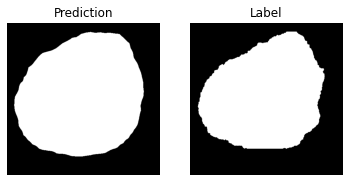

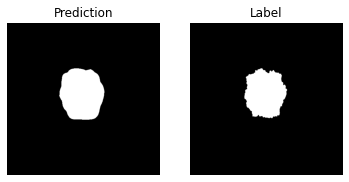

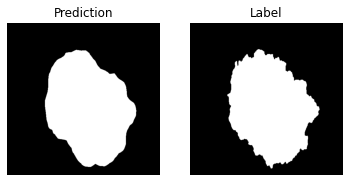

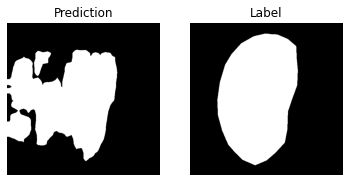

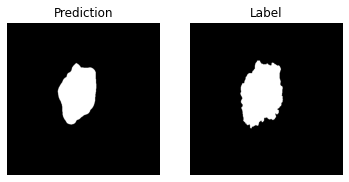

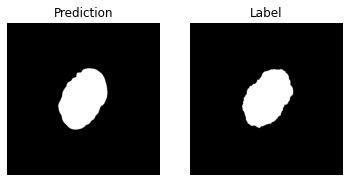

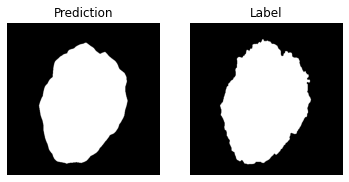

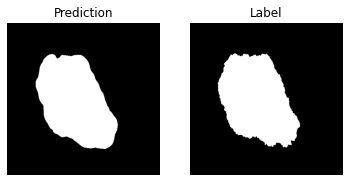

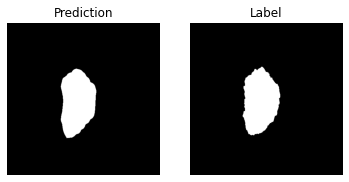

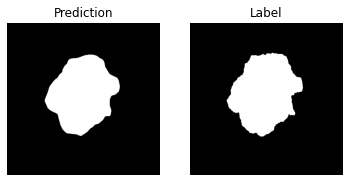

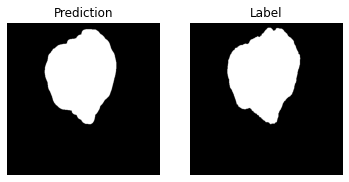

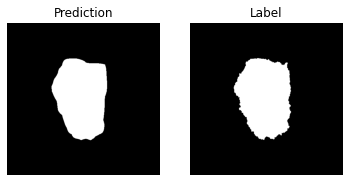

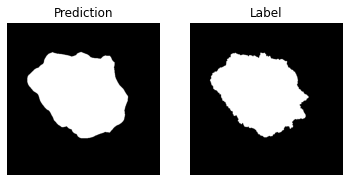

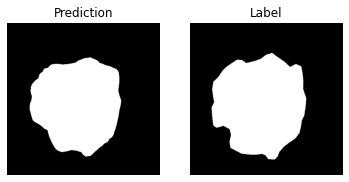

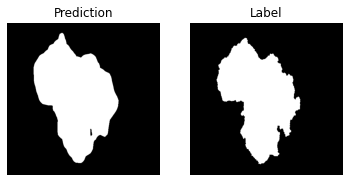

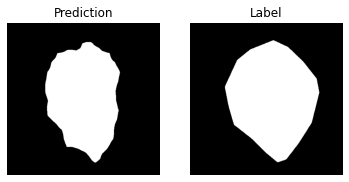

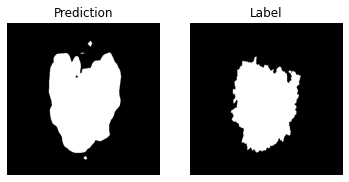

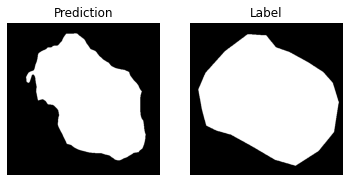

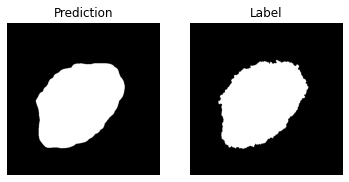

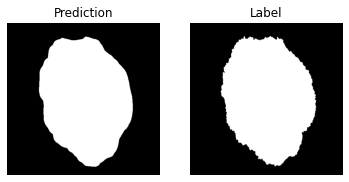

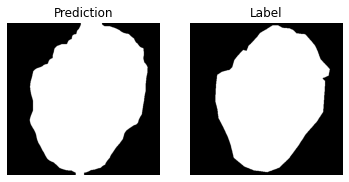

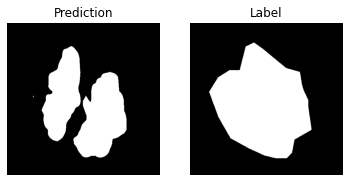

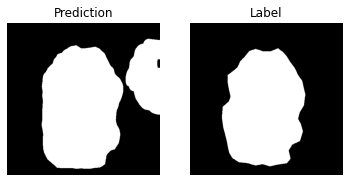

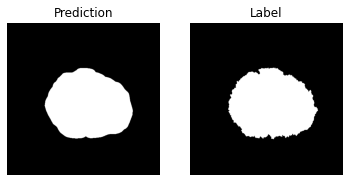

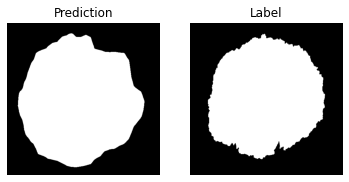

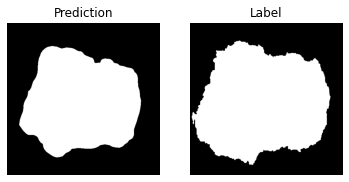

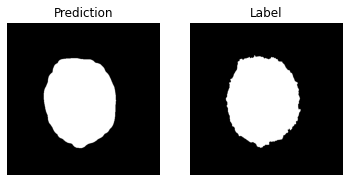

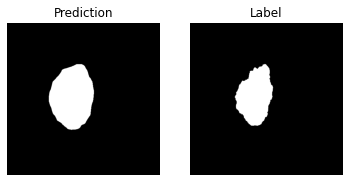

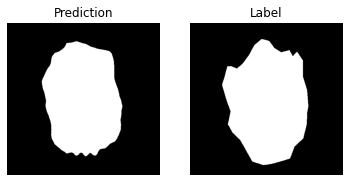

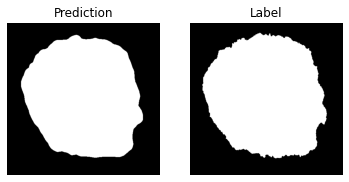

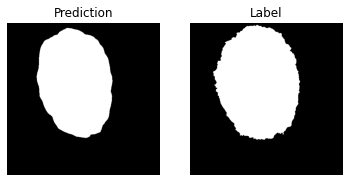

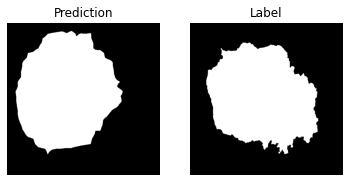

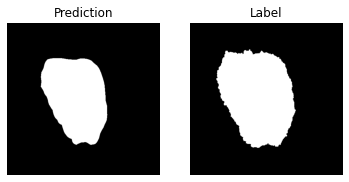

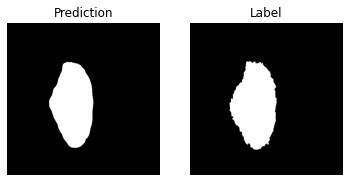

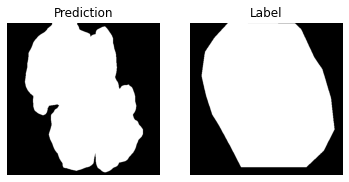

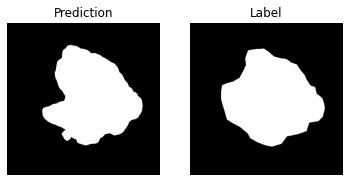

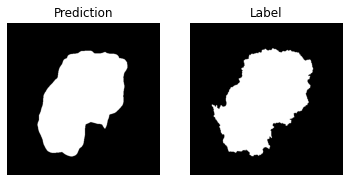

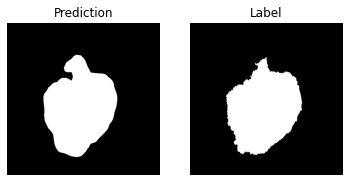

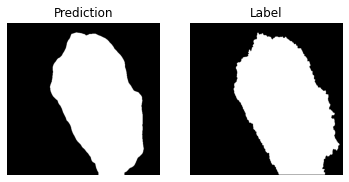

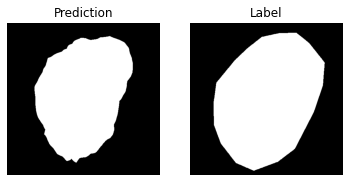

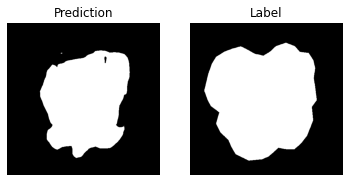

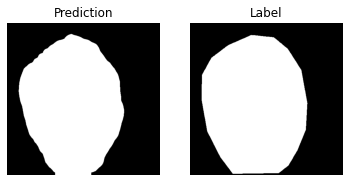

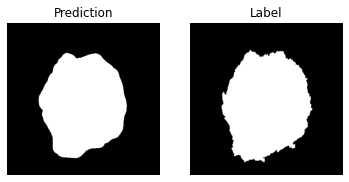

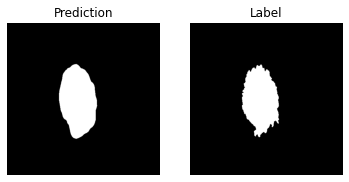

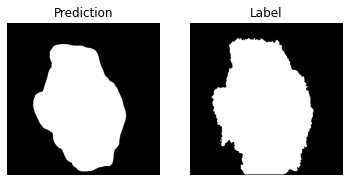

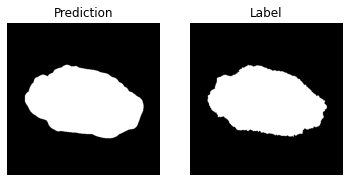

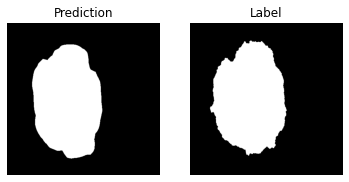

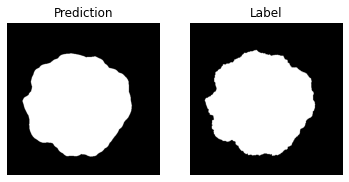

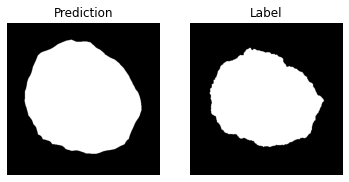

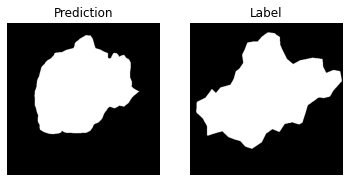

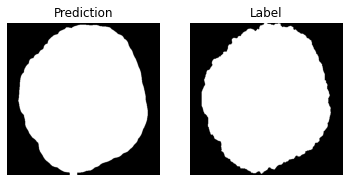

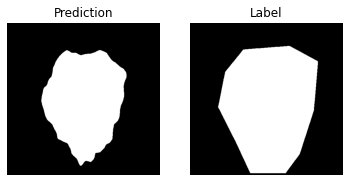

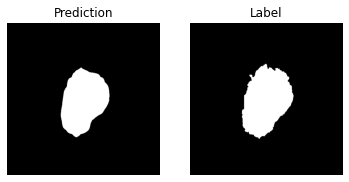

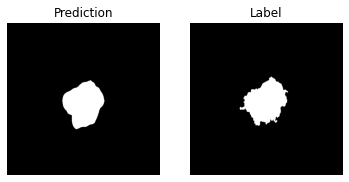

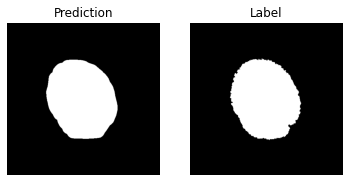

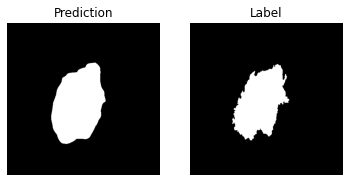

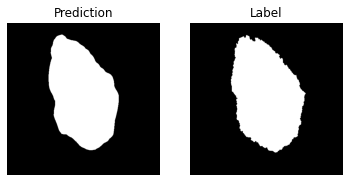

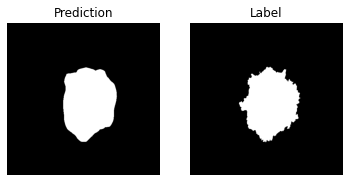

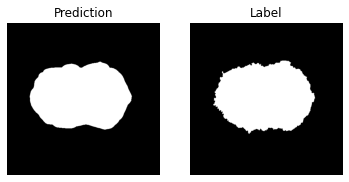

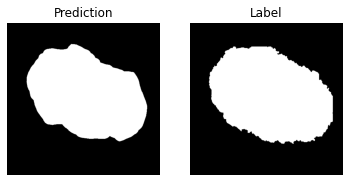

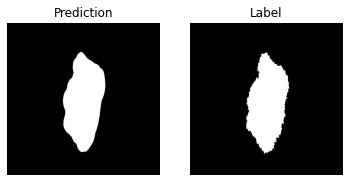

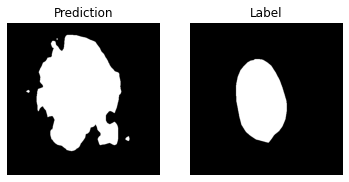

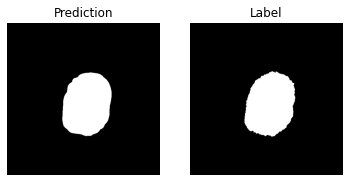

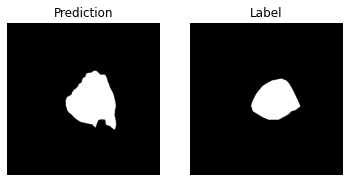

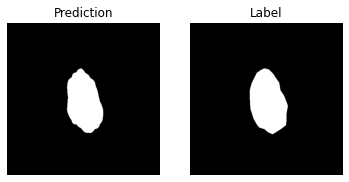

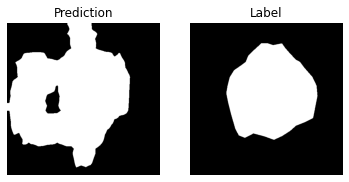

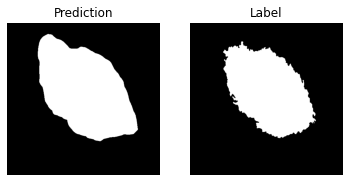

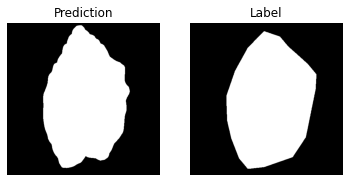

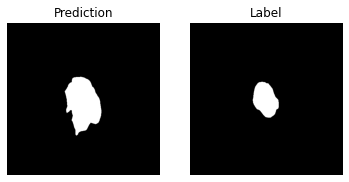

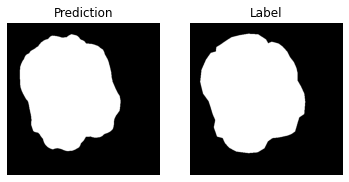

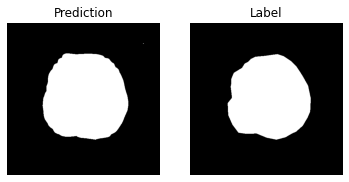

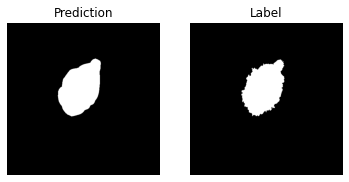

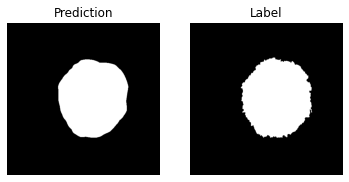

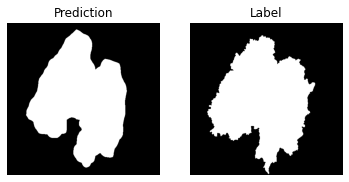

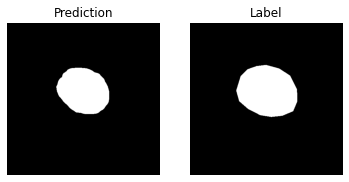

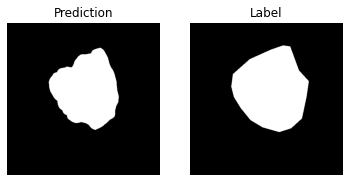

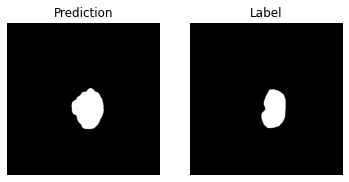

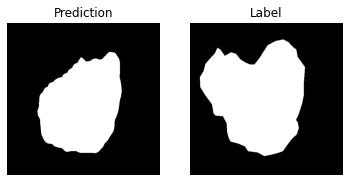

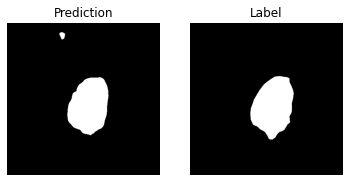

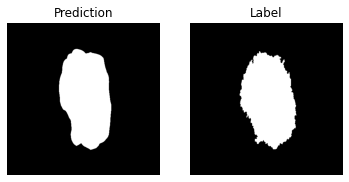

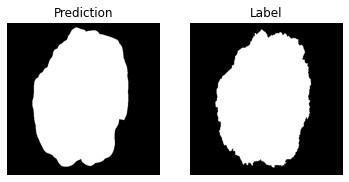

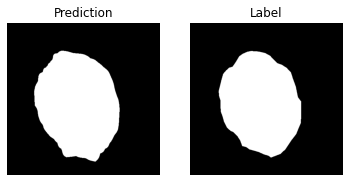

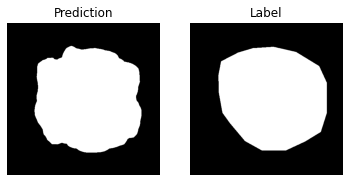

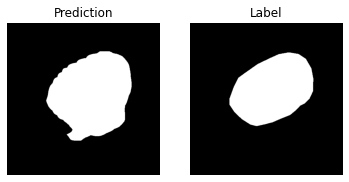

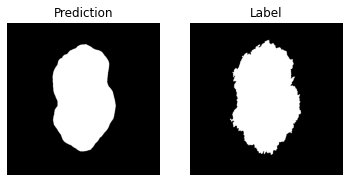

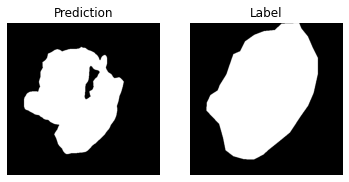

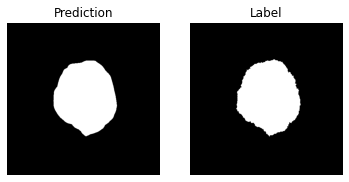

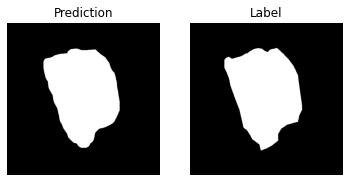

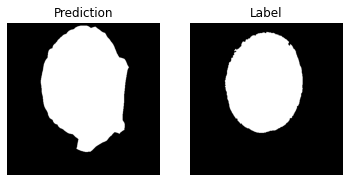

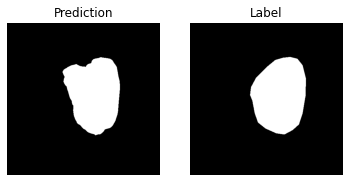

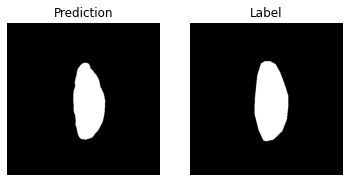

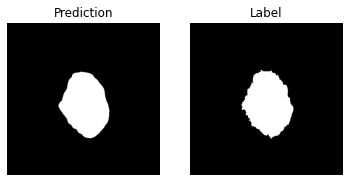

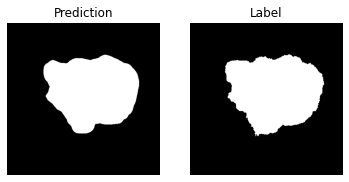

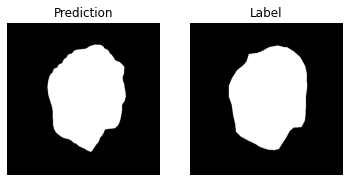

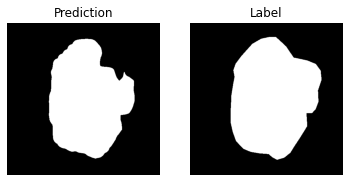

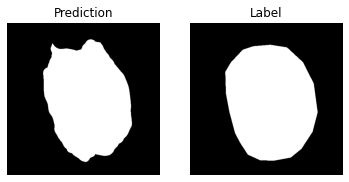

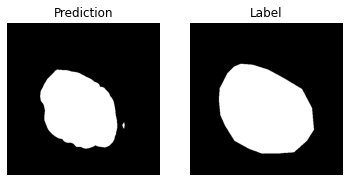

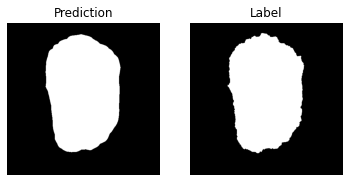

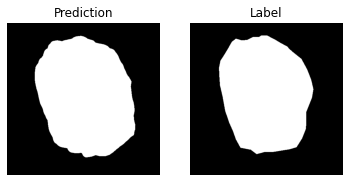

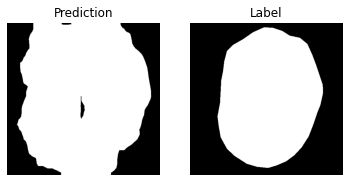

In [ ]:
import matplotlib.pyplot as plt
for i in range(100):
  filename=str(i)+'.npy'
  arr_pred=np.load('/content/drive/MyDrive/BAT_Resized_Data/Results/Pred Masks/'+filename)
  arr_label=np.load('/content/drive/MyDrive/BAT_Resized_Data/Results/Labels/'+filename)
  fig = plt.figure()
  rows = 1
  columns = 2

  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)

  # showing image
  plt.imshow(arr_pred,cmap='gray')
  plt.axis('off')
  plt.title("Prediction")

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)

  # showing image
  plt.imshow(arr_label,cmap='gray')
  plt.axis('off')
  plt.title("Label")